In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\co2 - co2.csv")
with pd.option_context('display.max_rows', 6): display(df)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
...,...,...,...,...,...,...,...,...,...,...,...,...
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [12]:
cols_to_encode = df.columns.tolist()
print(cols_to_encode)

['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


In [16]:
encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le 

df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1056,0,8,1,14,4,56,25,43,22,86
1,0,1056,0,12,1,25,4,69,35,54,18,111
2,0,1057,0,5,1,22,4,17,16,17,37,29
3,0,1232,11,21,3,15,4,84,49,69,14,145
4,0,1498,11,21,3,15,4,78,45,64,16,134
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1948,11,8,1,17,4,64,35,52,19,109
7381,41,1954,11,8,1,17,4,69,41,57,18,122
7382,41,1956,11,8,1,17,4,74,44,61,16,130
7383,41,1964,12,8,1,17,4,69,41,57,18,122


In [47]:
df.corr()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Make,1.000000,0.012790,-0.029558,-0.144341,-0.170095,0.181923,0.045368,-0.198220,-0.126072,-0.175662,0.183153,-0.152807
Model,0.012790,1.000000,0.190690,0.061675,0.034958,-0.016070,-0.079409,0.102649,0.163285,0.124460,-0.099200,0.109169
Vehicle Class,-0.029558,0.190690,1.000000,0.137713,0.112372,-0.156562,-0.033560,0.238750,0.329332,0.272963,-0.278271,0.285347
Engine Size(L),-0.144341,0.061675,0.137713,1.000000,0.923309,-0.322109,0.059443,0.834388,0.764646,0.819643,-0.762420,0.854697
Cylinders,-0.170095,0.034958,0.112372,0.923309,1.000000,-0.281948,0.107051,0.803489,0.726940,0.785997,-0.751132,0.832257
Transmission,0.181923,-0.016070,-0.156562,-0.322109,-0.281948,1.000000,0.212872,-0.346369,-0.355907,-0.353926,0.333740,-0.319021
Fuel Type,0.045368,-0.079409,-0.033560,0.059443,0.107051,0.212872,1.000000,-0.070867,-0.124391,-0.090675,-0.016576,0.099693
Fuel Consumption City (L/100 km),-0.198220,0.102649,0.238750,0.834388,0.803489,-0.346369,-0.070867,1.000000,0.948320,0.993783,-0.934610,0.922107
Fuel Consumption Hwy (L/100 km),-0.126072,0.163285,0.329332,0.764646,0.726940,-0.355907,-0.124391,0.948320,1.000000,0.977371,-0.899144,0.889087
Fuel Consumption Comb (L/100 km),-0.175662,0.124460,0.272963,0.819643,0.785997,-0.353926,-0.090675,0.993783,0.977371,1.000000,-0.933055,0.921353


In [70]:
corr_matrix = df.corr()
highly_correlated_features = corr_matrix['CO2 Emissions(g/km)'][
    (corr_matrix['CO2 Emissions(g/km)'].abs() > 0.85) & 
    (corr_matrix['CO2 Emissions(g/km)'] != 1)
]

In [71]:
highly_correlated_features

Engine Size(L)                      0.854697
Fuel Consumption City (L/100 km)    0.922107
Fuel Consumption Hwy (L/100 km)     0.889087
Fuel Consumption Comb (L/100 km)    0.921353
Fuel Consumption Comb (mpg)        -0.911824
Name: CO2 Emissions(g/km), dtype: float64

In [72]:
highly_correlated_feature_names = highly_correlated_features.index.tolist()

X = df[highly_correlated_feature_names]
y = df['CO2 Emissions(g/km)']

In [48]:
print(highly_correlated_feature_names)

['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_scaled = scaler.transform(X_train)
# # print(X_scaled)
# model.fit(X_scaled, y_train)


LinearRegression()

In [75]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Squared Error: 339.77
R^2 Score: 0.90
Root Mean Squared Error: 18.43


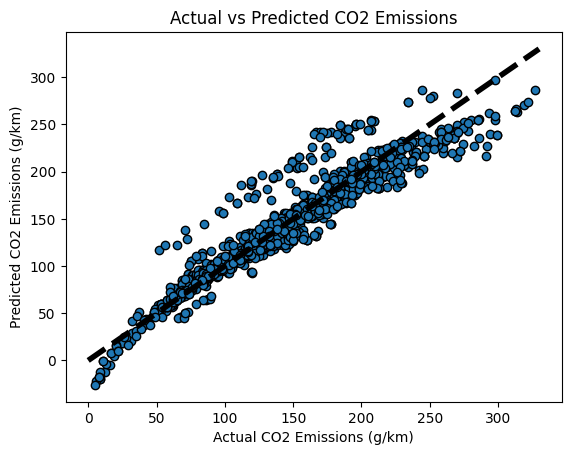

In [76]:
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()
